In [25]:
# Setup: Load Libraries and Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset (replace with your CSV path if needed)
df = pd.read_csv("student_performance_dataset.csv")  # Save Excel as CSV or use pd.read_excel()
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [27]:
# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [29]:
# Check for nulls
print(df.isnull().sum())

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64


In [31]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home',
                    'Extracurricular_Activities', 'Pass_Fail']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Rename columns for convenience
df.columns = [col.strip().replace(" ", "_") for col in df.columns]
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,1,31,68.267841,86,1,1,1,63,1
1,S136,1,16,78.222927,73,3,0,0,50,0
2,S209,0,21,87.525096,74,3,1,0,55,0
3,S458,0,27,92.076483,99,0,0,0,65,1
4,S078,0,37,98.655517,63,2,0,1,70,1


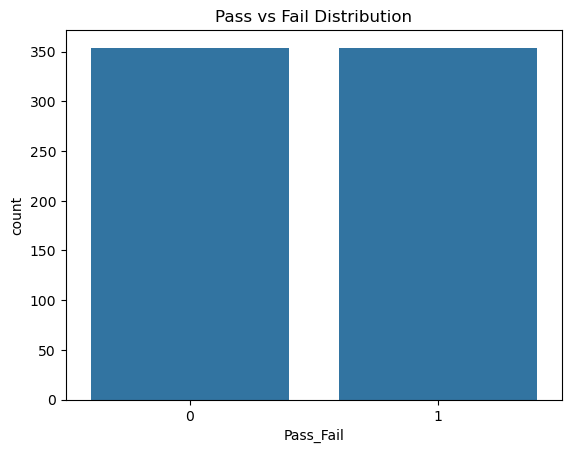

In [36]:
# Exploratory Data Analysis (EDA)
# Distribution of Pass vs Fail
sns.countplot(data=df, x='Pass_Fail')
plt.title('Pass vs Fail Distribution')
plt.show()



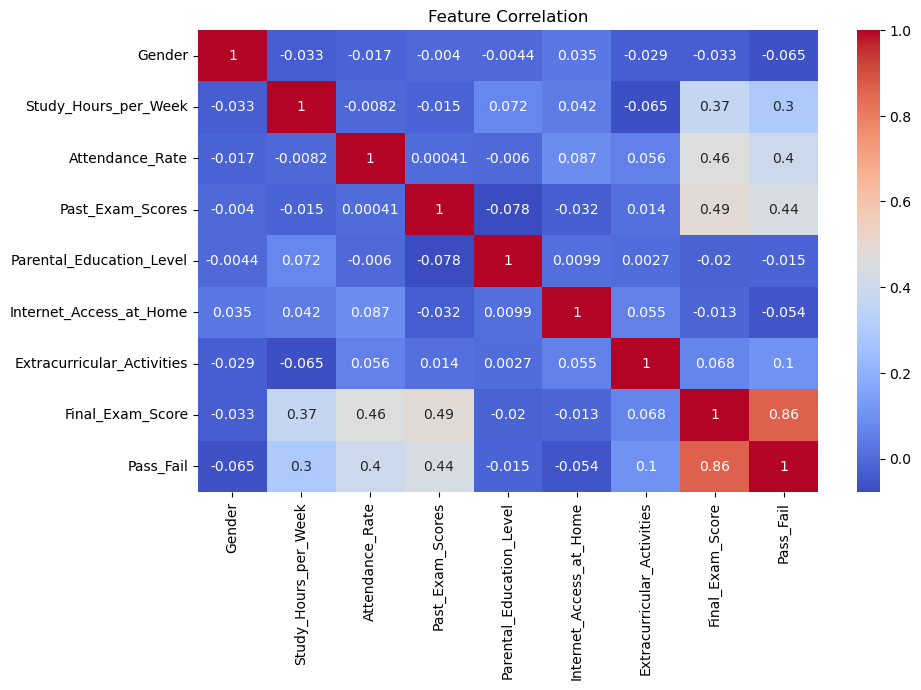

In [48]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('Student_ID', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()



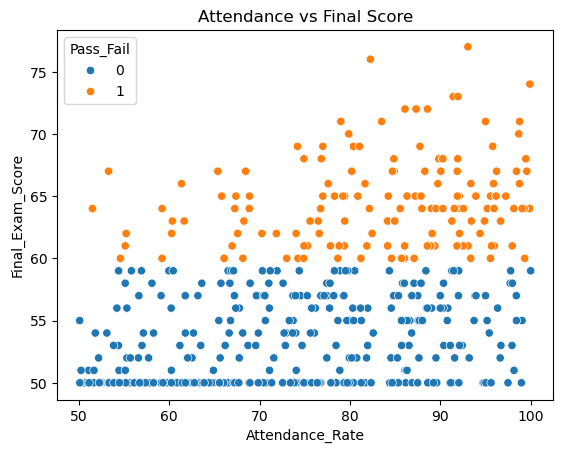

In [50]:
# Attendance vs Final Score
sns.scatterplot(data=df, x='Attendance_Rate', y='Final_Exam_Score', hue='Pass_Fail')
plt.title('Attendance vs Final Score')
plt.show()


In [52]:
# Feature Engineering & Train-Test Split
X = df.drop(['Student_ID', 'Final_Exam_Score', 'Pass_Fail'], axis=1)
y = df['Pass_Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Model Training and Evaluation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9154929577464789
Confusion Matrix:
 [[61 10]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91        71
           1       0.87      0.97      0.92        71

    accuracy                           0.92       142
   macro avg       0.92      0.92      0.92       142
weighted avg       0.92      0.92      0.92       142



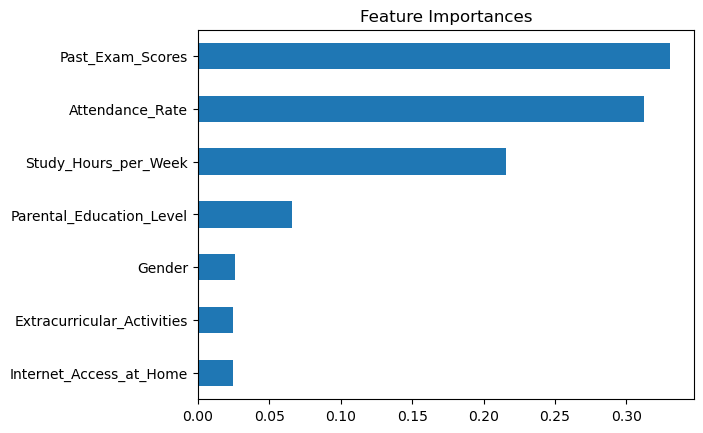

In [56]:
# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.show()
